In [2]:
import numpy as np
import matplotlib.pyplot as plt
import analysis_module as am

In [20]:

        
def compute_rate(distance, nr_of_trains, time_length, type_string):
    sum_rate = np.zeros((2,time_length))

    for i in range(nr_of_train_pairs):
            #pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter.npy"
            pattern_name = str(distance) + "_train_nr_" + str(i) + type_string + ".npy"
            pattern = np.load(pattern_name)
            print(pattern.shape)
            inhibitory_rate = np.sum(pattern[:,:,4:,:], axis = (0,1,2))
            excitatory_rate = np.sum(pattern[:,:,:4,:], axis = (0,1,2))
            print(excitatory_rate.shape)
            sum_rate[0,:] += excitatory_rate
            sum_rate[1,:] += inhibitory_rate
            
    mean_rate = sum_rate/nr_of_trains
    return mean_rate

            

In [13]:
spike_trains_base = np.load("spike_trains_base.npy")
spike_trains_jittered = np.load("spike_trains_jittered.npy")

In [14]:
print(spike_trains_base.shape)
print(spike_trains_jittered.shape)

(10, 500)
(10, 500, 3)


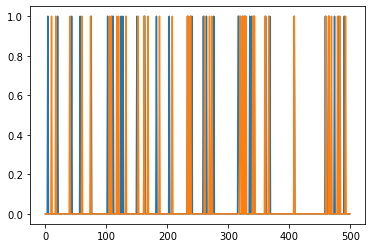

In [17]:
plt.plot(spike_trains_base[0,:,])
plt.plot(spike_trains_jittered[0,:,1])


(3, 500)


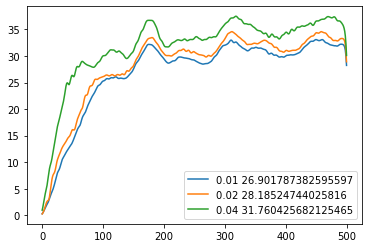

In [10]:
import numpy as np
import analysis_module as am
import matplotlib.pyplot as plt

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        #print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()


Observation: Distance seems pretty large, ratio appears to be conserved.
The Ichikevich model does however result in a bigger difference between resting voltage and treshold than the Circuit equation does so we should check the rate. 

In [3]:
pattern_1.shape

(10, 100, 6, 500)

[163.6166  45.0228]
[163.97    45.0578]
[163.7188  45.001 ]
[163.8166  45.1104]


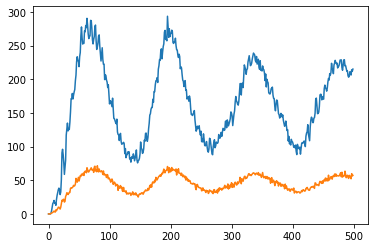

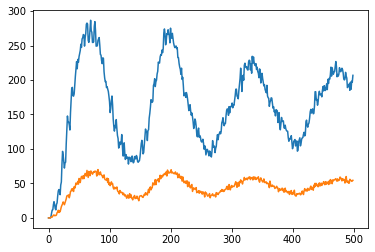

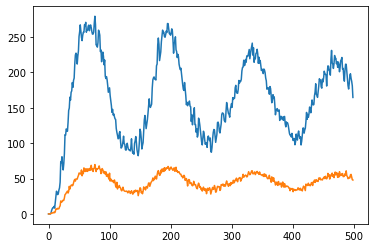

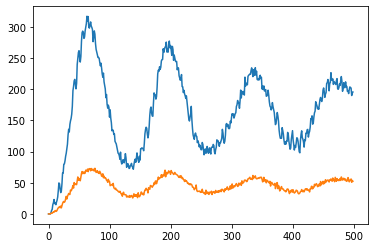

<Figure size 432x288 with 0 Axes>

In [23]:
rate_0 = compute_rate(0,10, "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0, axis = 1))
print(np.mean(rate_1, axis = 1))
print(np.mean(rate_2, axis = 1))
print(np.mean(rate_3, axis = 1))

Observation: We see that the network oscilliates as expected based on the original paper on the model. It seem sto be oscilating at around 8 hz given that there are 4 peaks over 500 ms

[167.29566667  46.982     ]
[167.51333333  46.97733333]
[166.246  46.703]
[166.48633333  46.76966667]


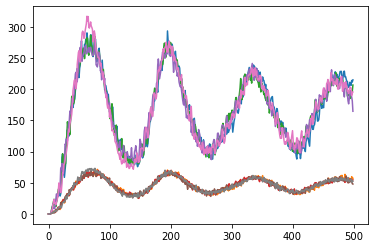

In [8]:
nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500


rate_0 = compute_rate(0,10, "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_heterogenous_Izhikevich_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])

plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])

plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])

plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])


print(np.mean(rate_0[:,200:], axis = 1))
print(np.mean(rate_1[:,200:], axis = 1))
print(np.mean(rate_2[:,200:], axis = 1))
print(np.mean(rate_3[:,200:], axis = 1))

0.01_train_nr_0_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.01_train_nr_1_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.01_train_nr_2_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.01_train_nr_3_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.01_train_nr_4_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.01_train_nr_5_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.01_train_nr_6_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.01_train_nr_7_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.01_train_nr_8_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.01_train_nr_9_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy
0.02_train_nr_0_network_history_1_homogenous_circuit_equation_somas_1_

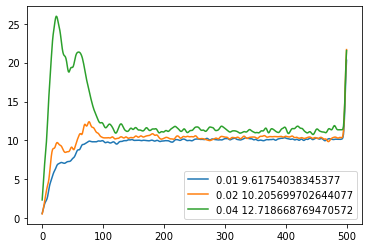

In [4]:
import numpy as np
import analysis_module as am
import matplotlib.pyplot as plt

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) + " " + str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()


Observation: The distance is a fair bit smaller than the Izhikevich model. 

[469.5872  92.275 ]
[470.0806  92.3362]
[469.3516  92.1974]
[471.191   92.5832]


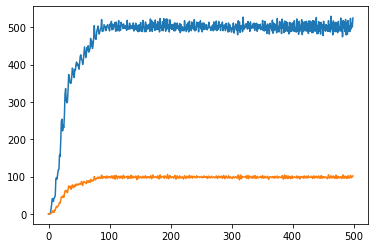

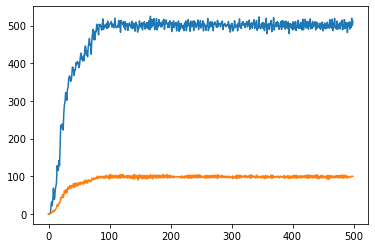

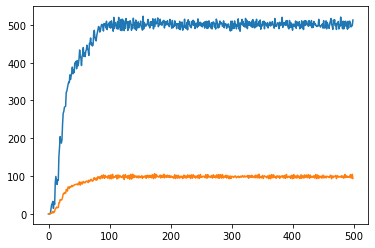

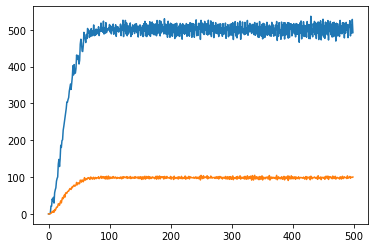

<Figure size 432x288 with 0 Axes>

In [24]:
rate_0 = compute_rate(0,10, "_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_homogenous_circuit_equation_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0, axis = 1))
print(np.mean(rate_1, axis = 1))
print(np.mean(rate_2, axis = 1))
print(np.mean(rate_3, axis = 1))

Observation: The rate is much higher and is also very stable. Could the difference in distance be because the networks are in different phases? The two controll parameters used by Maas et al. would affect the firing rate because they both increase variables that change the input strength of a neuron (number of inputs and weight strength)

We should try to tune the circuit equation to the same level of activity as the Izhikevich model to check if the distance becomes the same when the average activity level is the same

0.01_train_nr_0_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy
0.01_train_nr_1_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy
0.01_train_nr_2_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy
0.01_train_nr_3_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy
0.01_train_nr_4_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy
0.01_train_nr_5_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy
0.01_train_nr_6_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy
0.01_train_nr_7_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy
0.01_train_nr_8_network_history_1_homogenous_cir

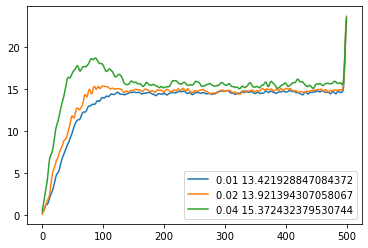

In [26]:
import numpy as np
import analysis_module as am
import matplotlib.pyplot as plt

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()

Observation: The distance appears to have increased and the ratio still seems to be conserved. 

[238.0076  48.0392]
[238.6244  48.198 ]
[239.1186  48.282 ]
[238.036   48.0138]


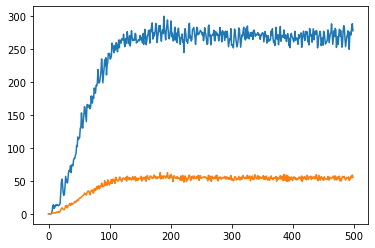

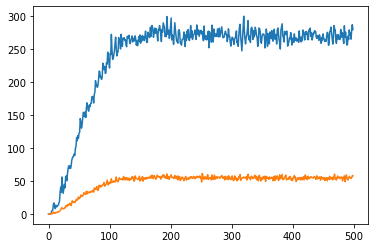

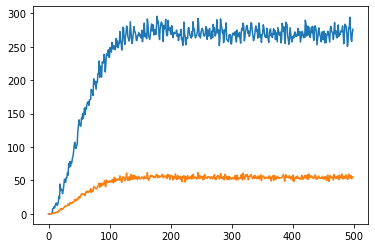

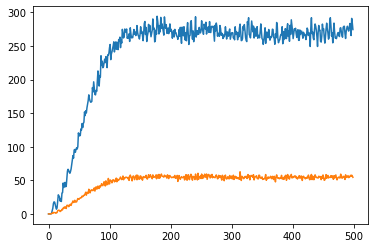

<Figure size 432x288 with 0 Axes>

In [9]:
rate_0 = compute_rate(0,10, "_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_homogenous_circuit_equation_similar_treshold_distance_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0, axis = 1))
print(np.mean(rate_1, axis = 1))
print(np.mean(rate_2, axis = 1))
print(np.mean(rate_3, axis = 1))

Observation: The activity level is lower now, mainly around the peak of the waves in the Izhikevich model. 

I'm tuning the model by increasing the distance between the treshold and the resting voltage by decreasing the non-specific input voltage and the reset voltage. I think the setting here was input_current and reset voltage = 10, threshold = 15

(3, 500)


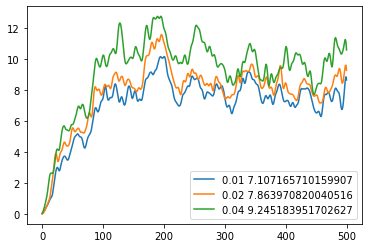

In [27]:

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_8_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_8_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        #print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()

Increased the distance between threshold and resting voltage to 8, keeping threshold constant. 

Observation: The distance is lower this time, how's the rate?

[12.975   2.7642]
[13.4322  2.8724]
[13.3644  2.8608]
[12.4996  2.676 ]


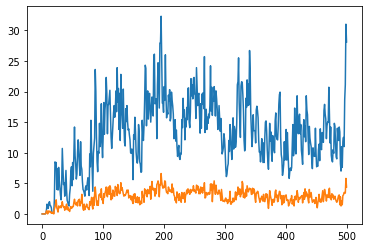

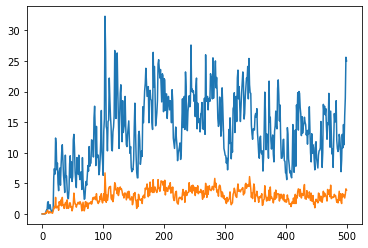

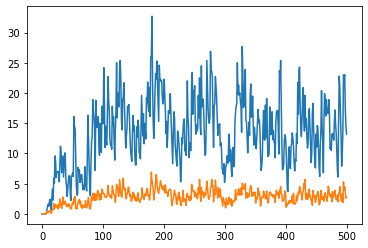

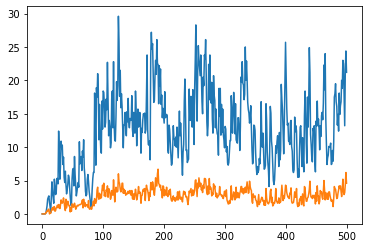

<Figure size 432x288 with 0 Axes>

In [28]:
rate_0 = compute_rate(0,10, "_network_history_1_homogenous_circuit_equation_8_treshold_distance_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_homogenous_circuit_equation_8_treshold_distance_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_homogenous_circuit_equation_8_treshold_distance_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_homogenous_circuit_equation_8_treshold_distance_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0, axis = 1))
print(np.mean(rate_1, axis = 1))
print(np.mean(rate_2, axis = 1))
print(np.mean(rate_3, axis = 1))

Observation: The rate is far too low this time, but is there an indication of cyclical is there some frequency in there? looks like there could be waves

(3, 500)


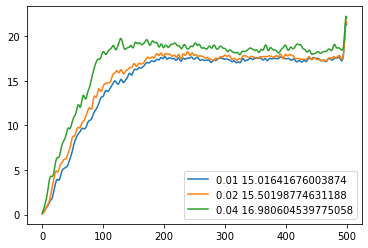

In [8]:

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_6_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_6_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        #print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()

Decreased the distance to the treshold to 6

Observation: distance increased again

[93.9598 18.019 ]
[95.498 18.312]
[95.798  18.3498]
[93.4458 17.9074]


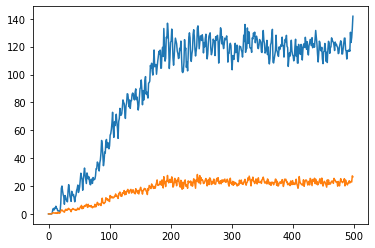

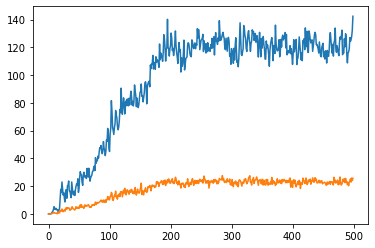

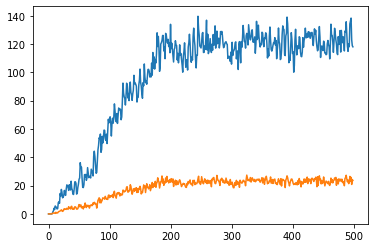

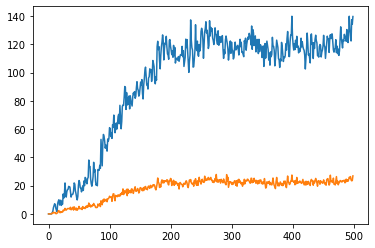

<Figure size 432x288 with 0 Axes>

In [5]:
nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

rate_0 = compute_rate(0,10, "_network_history_1_homogenous_circuit_equation_6_treshold_distance_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_homogenous_circuit_equation_6_treshold_distance_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_homogenous_circuit_equation_6_treshold_distance_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_homogenous_circuit_equation_6_treshold_distance_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0, axis = 1))
print(np.mean(rate_1, axis = 1))
print(np.mean(rate_2, axis = 1))
print(np.mean(rate_3, axis = 1))

Observation: THe rate is still not at the same level, interesting the time it takes for the network to reach a stable level of activity seem longer.
THe stable level is fairly close to the Izhikevich model though

I'll try tuning it a bit closer

(3, 500)


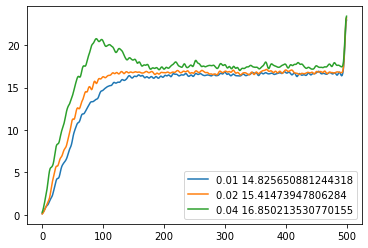

In [12]:

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_5_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_5_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        #print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()

[193.541       38.24066667]
[194.588  38.442]
[193.68466667  38.265     ]
[193.27933333  38.15433333]


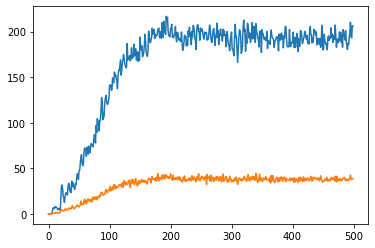

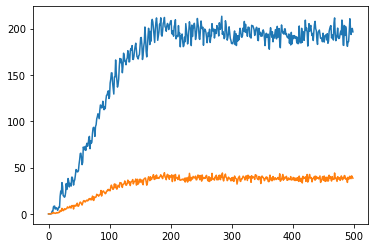

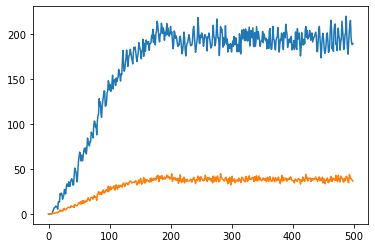

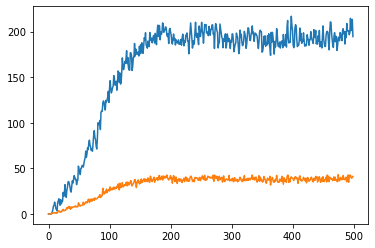

<Figure size 432x288 with 0 Axes>

In [13]:
nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

rate_0 = compute_rate(0,10, "_network_history_1_homogenous_circuit_equation_5_treshold_distance_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_homogenous_circuit_equation_5_treshold_distance_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_homogenous_circuit_equation_5_treshold_distance_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_homogenous_circuit_equation_5_treshold_distance_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0[:,200:], axis = 1))
print(np.mean(rate_1[:,200:], axis = 1))
print(np.mean(rate_2[:,200:], axis = 1))
print(np.mean(rate_3[:,200:], axis = 1))

(3, 500)


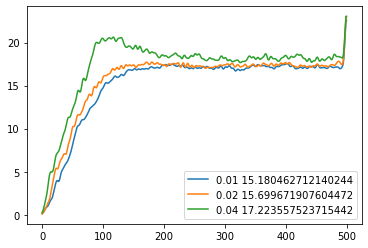

In [16]:

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        #print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()

[156.45166667  30.541     ]
[157.01233333  30.64266667]
[156.64033333  30.55933333]
[155.55966667  30.336     ]


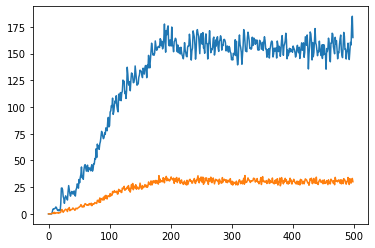

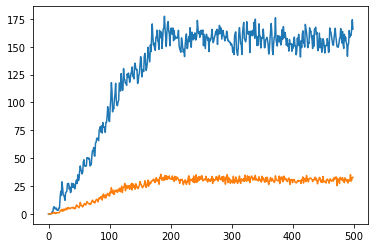

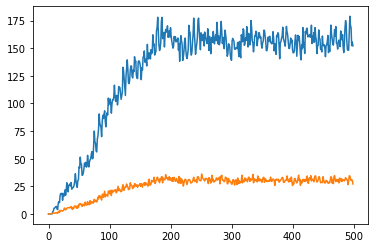

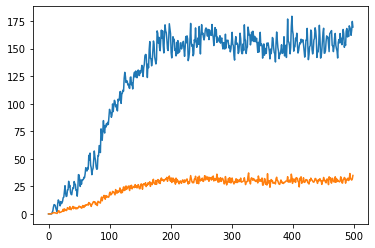

<Figure size 432x288 with 0 Axes>

In [15]:
nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

rate_0 = compute_rate(0,10, "_network_history_1_homogenous_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_homogenous_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_homogenous_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_homogenous_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0[:,200:], axis = 1))
print(np.mean(rate_1[:,200:], axis = 1))
print(np.mean(rate_2[:,200:], axis = 1))
print(np.mean(rate_3[:,200:], axis = 1))

(3, 500)


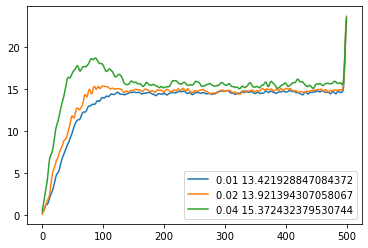

In [9]:

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_4_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_4_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        #print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()

[269.95933333  54.57333333]
[270.45033333  54.72133333]
[269.86033333  54.594     ]
[269.88133333  54.55833333]


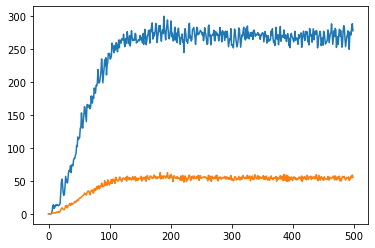

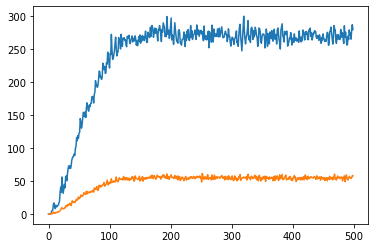

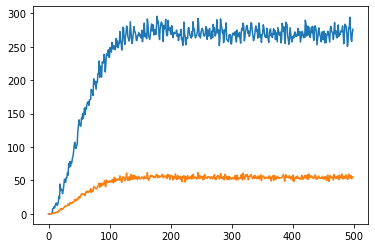

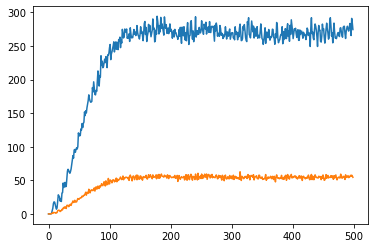

<Figure size 432x288 with 0 Axes>

In [8]:
nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

rate_0 = compute_rate(0,10, "_network_history_1_homogenous_circuit_equation_4_treshold_distance_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_homogenous_circuit_equation_4_treshold_distance_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_homogenous_circuit_equation_4_treshold_distance_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_homogenous_circuit_equation_4_treshold_distance_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0[:,200:], axis = 1))
print(np.mean(rate_1[:,200:], axis = 1))
print(np.mean(rate_2[:,200:], axis = 1))
print(np.mean(rate_3[:,200:], axis = 1))

NOte: Accidentally overwrote the 5p5 simulation data, so this is the tb distance of 4 not 5p5

(3, 500)


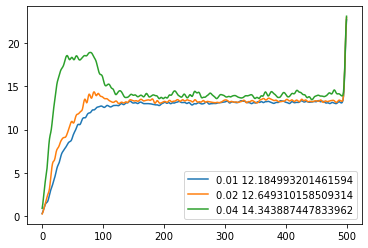

In [6]:

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_3_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_homogenous_circuit_equation_3_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        #print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()

[351.76233333  71.83666667]
[352.059       71.88866667]
[351.723  71.833]
[351.458  71.791]


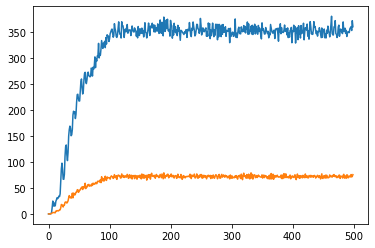

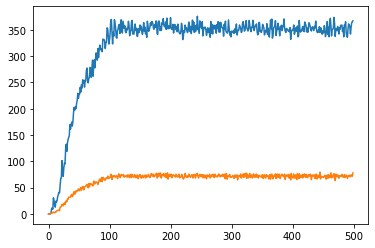

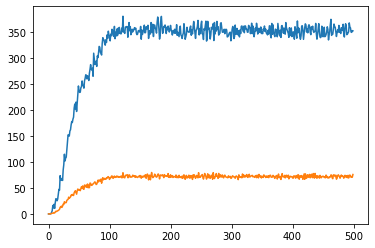

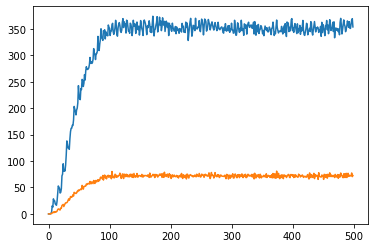

<Figure size 432x288 with 0 Axes>

In [7]:
nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

rate_0 = compute_rate(0,10, "_network_history_1_homogenous_circuit_equation_3_treshold_distance_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_homogenous_circuit_equation_3_treshold_distance_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_homogenous_circuit_equation_3_treshold_distance_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_homogenous_circuit_equation_3_treshold_distance_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0[:,200:], axis = 1))
print(np.mean(rate_1[:,200:], axis = 1))
print(np.mean(rate_2[:,200:], axis = 1))
print(np.mean(rate_3[:,200:], axis = 1))

In [ ]:
0.04_train_nr_9_network_history_1_heterogenous_normal_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter

(3, 500)


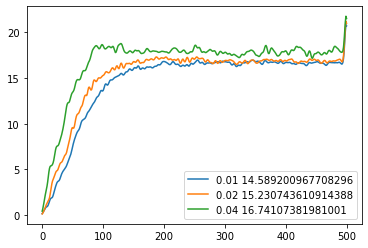

In [5]:
import numpy as np
import analysis_module as am
import matplotlib.pyplot as plt

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_heterogenous_normal_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_heterogenous_normal_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        #print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()

[123.58233333  23.83633333]
[124.354       23.99066667]
[123.774       23.85966667]
[123.12033333  23.71266667]


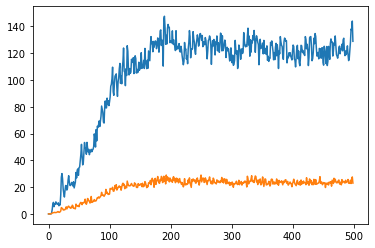

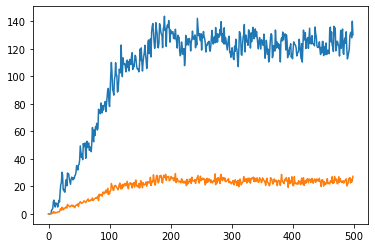

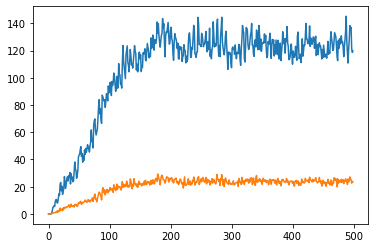

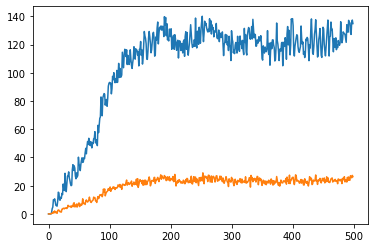

<Figure size 432x288 with 0 Axes>

In [4]:
nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 500

rate_0 = compute_rate(0,10, "_network_history_1_heterogenous_normal_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10, "_network_history_1_heterogenous_normal_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10, "_network_history_1_heterogenous_normal_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10, "_network_history_1_heterogenous_normal_circuit_equation_5p5_treshold_distance_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0[:,200:], axis = 1))
print(np.mean(rate_1[:,200:], axis = 1))
print(np.mean(rate_2[:,200:], axis = 1))
print(np.mean(rate_3[:,200:], axis = 1))

(3, 2000)


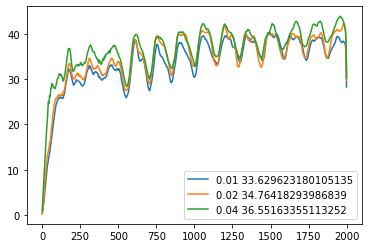

In [23]:
import numpy as np
import analysis_module as am
import matplotlib.pyplot as plt

nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 2000

distances_along_time = np.zeros((nr_of_distances, nr_of_train_pairs, train_length_in_data_points))
distances = [0.01, 0.02, 0.04]

for index, d in enumerate(distances):

    for i in range(nr_of_train_pairs):
        pattern_0_name = '0' + "_train_nr_" + str(i) + "_network_history_1_heterogenous_Izhikevich_long_trials_somas_1_distance_by_jitter.npy"
        pattern_1_name = str(d) + "_train_nr_" + str(i) + "_network_history_1_heterogenous_Izhikevich_long_trials_somas_1_distance_by_jitter.npy"
        pattern_0 = np.load(pattern_0_name)
        pattern_1 = np.load(pattern_1_name)
        # To do: implement import of trains
        #print(pattern_1_name)

        convolved_pattern_0 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_0, tau = 5, time_averaged = True)
        convolved_pattern_1 = np.apply_along_axis(am.gaussian_convolution, -1, pattern_1, tau = 5, time_averaged = True)
        #plt.plot(convolved_pattern_0[0,0,0,:])
        #plt.show()
        distance_vector = convolved_pattern_0 - convolved_pattern_1

        flattened_state_history = am.flatten_high_dimensional_state_history(distance_vector, -1)

        distance = np.linalg.norm(flattened_state_history, axis = 1, ord = 2)

        distances_along_time[index,i, :] = distance


#mean_distance_over_time_per_distance = np.mean(distances_along_time)

mean_distance = np.mean(distances_along_time, axis = 1)
print(mean_distance.shape)
for i in range(3):
    plt.plot(mean_distance[i,:], label = str(distances[i]) +" "+ str(np.mean(mean_distance[i,:])))
plt.legend()
plt.show()

(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(10, 100, 6, 2000)
(2000,)
(

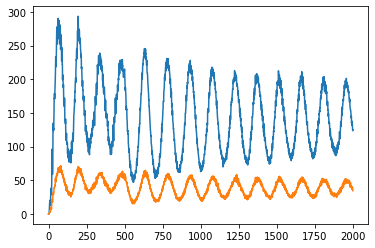

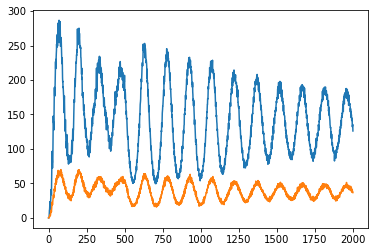

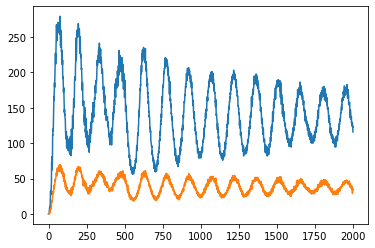

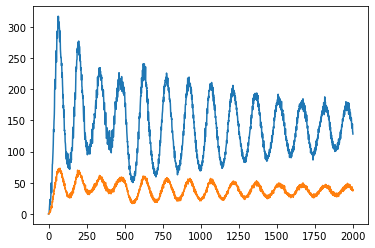

<Figure size 432x288 with 0 Axes>

In [21]:
nr_of_distances = 3
nr_of_train_pairs = 10
train_length_in_data_points = 2000

rate_0 = compute_rate(0,10,train_length_in_data_points, "_network_history_1_heterogenous_Izhikevich_long_trials_somas_1_distance_by_jitter")
rate_1 = compute_rate(0.01,10,train_length_in_data_points, "_network_history_1_heterogenous_Izhikevich_long_trials_somas_1_distance_by_jitter")
rate_2 = compute_rate(0.02, 10,train_length_in_data_points, "_network_history_1_heterogenous_Izhikevich_long_trials_somas_1_distance_by_jitter")
rate_3 = compute_rate(0.04,10,train_length_in_data_points, "_network_history_1_heterogenous_Izhikevich_long_trials_somas_1_distance_by_jitter")

plt.plot(rate_0[0,:])
plt.plot(rate_0[1,:])
plt.figure()
plt.plot(rate_1[0,:])
plt.plot(rate_1[1,:])
plt.figure()
plt.plot(rate_2[0,:])
plt.plot(rate_2[1,:])
plt.figure()
plt.plot(rate_3[0,:])
plt.plot(rate_3[1,:])
plt.figure()

print(np.mean(rate_0[:,200:], axis = 1))
print(np.mean(rate_1[:,200:], axis = 1))
print(np.mean(rate_2[:,200:], axis = 1))
print(np.mean(rate_3[:,200:], axis = 1))

In [25]:
x = np.load("0.04_train_nr_1_network_history_1_heterogenous_Izhikevich_long_trials_somas_1_distance_by_jitter.npy")

In [26]:
x.shape

(10, 100, 6, 2000)

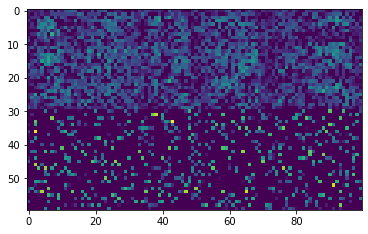

In [37]:
x_2 = np.zeros((60,100))
for u in range(10):
    x = np.load("0.04_train_nr_" + str(u) + "_network_history_1_heterogenous_Izhikevich_long_trials_somas_1_distance_by_jitter.npy")
    x_1 = np.sum(x,axis = 3)
    for i in range(6):
        x_2[i*10:i*10+10,:] += x_1[:,:,i]
plt.imshow(x_2)